In [1]:
%%bash
cd ../chaste_build/
make CartilageSheetSimulation

[  5%] Built target timekeeper
[ 11%] Built target chaste_global
[ 16%] Built target chaste_linalg
[ 16%] Built target chaste_io
[ 22%] Built target chaste_ode
[ 38%] Built target chaste_mesh
[ 44%] Built target chaste_pde
[ 88%] Built target chaste_cell_based
Scanning dependencies of target chaste_project_cartilage
[ 88%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/NodeBasedCartilageSheet.cpp.o
[ 88%] Linking CXX shared library libchaste_project_cartilage.so
[100%] Built target chaste_project_cartilage
[100%] Linking CXX executable CartilageSheetSimulation
[100%] Built target CartilageSheetSimulation


In [2]:
import sys
sys.path.append('../analysis')
sys.path.append('../')

import numpy as np
import matplotlib.image as mpimg
import time 
import matplotlib.pyplot as plt
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
          'axes.labelsize': 'xx-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'xx-large',
          'ytick.labelsize':'xx-large',
          'legend.fontsize': 'xx-large',
          'font.size': 12,
          'axes.titlepad': 12,
          'axes.labelpad': 12,
          'font.family': 'serif',
          'mathtext.fontset': 'cm',
         }
plt.rcParams.update(params)

defcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# path_to_label_files = '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/picked_result_files/'
path_to_plots = 'data/plots/'

# Run simulations and post-processing

Simulations are currently saved to 

`'/home/kubuntu1804/Documents/sf_simulation_results/' + output_directory`

The path can be changed by directly editing `distribute_executable.py`

In [16]:
#output_directory = 'exp-baseline/' + time.strftime("%Y%m%d-%H%M%S") +'/'
output_directory = 'exp-draft/cartilage_sheet/baseline/' + time.strftime("%Y%m%d-%H%M%S") +'/'

flags = ''
#flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 80.0' # final time 80h
flags = flags + ' --sw 8' # 8 cells in x direction
flags = flags + ' --sd 12' # 12 cells in y direction
flags = flags + ' --sh 6' # 6 cells in z direction
flags = flags + ' --pu 1' # 1 layer perichondrial cells above (taken from the specified number of cells in the z-direction)
flags = flags + ' --pl 1' # 1 layer perichondrial cells below (taken from the specified number of cells in the z-direction)
flags = flags + ' --nb 2' # both an upper and a lower rigid boundary
flags = flags + ' --mu 0.0' # adhesive spring stiffness set to 0.0 (ratio 0.25)
flags = flags + ' --A 0.10' # proliferation rate of 10%
flags = flags + ' --F pwq' # PWQ force
flags = flags + ' --mu_R 20.0' # set repulsive spring stiffness to 20.0
flags = flags + ' --p 0.1' # set perturbation to 0.1
flags = flags + ' --psl 5'
flags = flags + ' --u 5.5' # set distance between boundaries to 5.5
#flags = flags + ' --cg ' # use a Cartesian grid for initial placement
flags = flags + ' --sc 1.2' # scale initial sheet to generate more space
flags = flags + ' --g1s 10.0' # g1 duration for stem cells (perichondrial cells)
flags = flags + ' --g1t 10.0' # g1 duration for transit cells (chondrocytes)
flags = flags + ' --ds 3.0' # s phase duration

#flags = flags + ' --rdd' #random division directions

executable='/home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation'

In [17]:
de.run_simulations_multiple_random_seeds(output_directory, flags=flags, number_of_simulations=8, executable=executable)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-draft/cartilage_sheet/baseline/20220609-195210/ --S 0 --T 80.0 --sw 8 --sd 12 --sh 6 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.10 --F pwq --mu_R 20.0 --p 0.1 --psl 5 --u 5.5 --sc 1.2 --g1s 10.0 --g1t 10.0 --ds 3.0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-draft/cartilage_sheet/baseline/20220609-195210/ --S 1 --T 80.0 --sw 8 --sd 12 --sh 6 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.10 --F pwq --mu_R 20.0 --p 0.1 --psl 5 --u 5.5 --sc 1.2 --g1s 10.0 --g1t 10.0 --ds 3.0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-draft/cartilage_sheet/baseline/20220609-195210/ --S 2 --T 80.0 --sw 8 --sd 12 --sh 6 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.10 --F pwq --mu_R 20.0 --p 0.1 --psl 5 --u 5.5 --sc 1.2 --g1s 10.0 --g1t 10.0 --ds 3.0
nice -n 19 /home/kubun

output_directory = 'exp-draft/cartilage_sheet/baseline/20220609-141147/'

In [18]:
de.run_postprocessing_multiple_random_seeds(8, output_directory)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-195210/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-195210/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-195210/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-195210/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-195210/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-195210/5/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-195210/6/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-195210/7/result

analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN slice encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN slice encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:105: RuntimeWarning: All-NaN slice encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:105: RuntimeWarning: All-NaN slice encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:106: RuntimeWarning: All-NaN slice encountered
  width[:, 2] = abs(np.nanmax(coordinates[:,2::3], axis=1)- np.nanmin(coordinates[:,2::3], axis=1))
analysis/sheet_metrics.py:106: RuntimeWarning: All-NaN slice encountered
  width[:, 2] = abs(np.nanmax(coordinates[:,2::3], axis=1)- np

The runtime warning about all nan-slices is due there being time points at the beginning of the simulation where each clonal patch is empty (the originial perichondrial cell that will seed the patch is not counted towards the patch.) This should not affect the results as far as I can tell because np.nanmean only returns nan if all entries are nan and then plt.plot ignores np.nan.

# Plot cartilage sheet

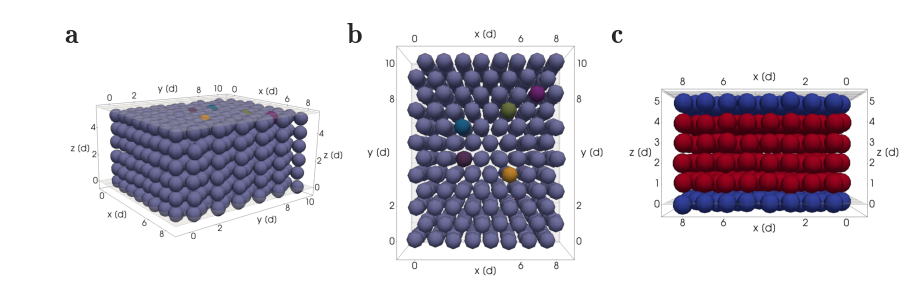

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                                             figsize=(15,5), sharey='col', sharex='col',
                                             gridspec_kw={ 'hspace': 0.001, 'wspace':0.00001},
                                             #tight_layout=True
                                            )

#initial = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-141147/1/cartilage_sheet_configuration_-y_cell_tissue_types.png')
initial = mpimg.imread('data/cartilage_sheet/baseline/20220609-141147/1/cartilage_sheet_t0.png')
#crop
initial = initial[200:-150, 520:-520]
ax1.imshow(initial)
#ax1.grid(False)
ax1.axis('off')
ax1.annotate(r'$\bf a$', (0.07, 0.85), xycoords='figure fraction', fontsize=28)

#initial = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-141147/1/cartilage_sheet_configuration_-y_cell_tissue_types.png')
initial = mpimg.imread('data/cartilage_sheet/baseline/20220609-141147/1/cartilage_sheet_-z_t0.png')
#crop
initial = initial[50:-50, 600:-600]
ax2.imshow(initial)
#ax1.grid(False)
ax2.axis('off')
ax2.annotate(r'$\bf b$', (0.38, 0.85), xycoords='figure fraction', fontsize=28)

#xy = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-141147/1/cartilage_sheet_-z_t0.png')
xy= mpimg.imread('data/cartilage_sheet/baseline/20220609-141147/1/cartilage_sheet_configuration_-y_cell_tissue_types.png')

#crop
xy = xy[250:-250, 625:-625]
ax3.imshow(xy)
#ax1.grid(False)
ax3.axis('off')
#ax2.set_title(r'$\bf b$', loc='left', fontsize=28)
ax3.annotate(r'$\bf c$', (0.67, 0.85), xycoords='figure fraction', fontsize=28)

plt.savefig(path_to_plots+'cartilage_sheet.pdf', bbox_inches='tight', dpi=600)

# Generate baseline experiment to show that oriented cell division is insufficient for intercalation

Data:
- 8 random seeds T=80 runs 2 and 7 crashed, then rerun
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-draft/cartilage_sheet/baseline/20220609-141147/ --S 0 --T 80.0 --sw 8 --sd 12 --sh 6 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.10 --F pwq --mu_R 20.0 --p 0.1 --psl 5 --u 5.5 --sc 1.075 --g1s 10.0 --g1t 10.0 --ds 3.0


Compare with:
- 8 random seeds, MesenchymalCondensation psl=5
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/psl5/20220610-104855/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 4.5 --psl 5 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0

In [3]:
dir_baseline = 'data/cartilage_sheet/baseline/20220609-141147/'

# save label-path tuple
# with open(path_to_label_files+'baseline', 'w') as f:
#     f.write(dir_baseline+'1/')
    
dir_comparison = 'data/mesenchymal_condensation/psl5/20220610-104855/'
# with open(path_to_label_files+'psl5', 'w') as f:
#     f.write(dir_comparison+'0/')

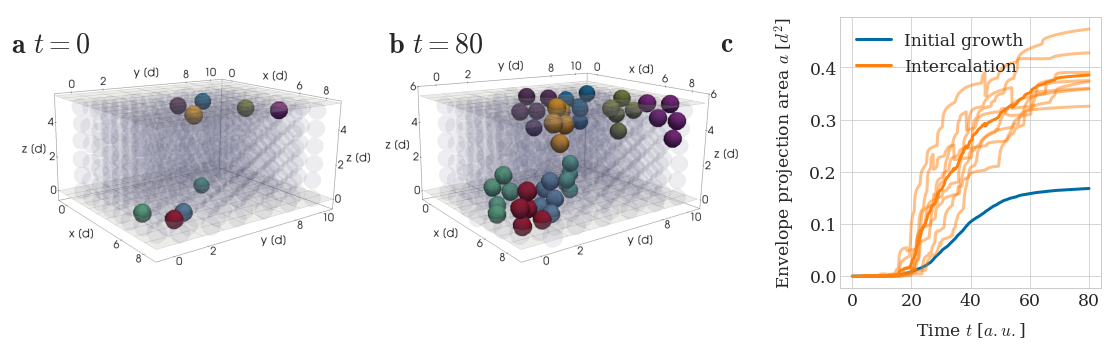

In [11]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, 
                                             figsize=(14,5), sharey='col', sharex='col',
                                             gridspec_kw={ 'hspace': 0.001, 'wspace':0.00001},
                                             #tight_layout=True
                                            )

initial = mpimg.imread('data/cartilage_sheet/baseline/20220609-141147/1/cartilage_sheet_columns_t0.png')
#crop
initial = initial[150:-150, 480:-480]
ax1.imshow(initial)
#ax1.grid(False)
ax1.axis('off')
ax1.annotate(r'$\bf a$ $t=0$', (0.01, 0.85), xycoords='figure fraction', fontsize=28)
ll, bb, ww, hh = ax1.get_position().bounds 
ax1.set_position([ll-1.4*ww, bb-0.2*hh, ww*1.45, hh*1.45])

xy = mpimg.imread('data/cartilage_sheet/baseline/20220609-141147/1/cartilage_sheet_columns_t80.png')
#crop
xy = xy[150:-150, 480:-480]
ax2.imshow(xy)
#ax1.grid(False)
ax2.axis('off')
#ax2.set_title(r'$\bf b$', loc='left', fontsize=28)
ax2.annotate(r'$\bf b$ $t=80$', (0.35, 0.85), xycoords='figure fraction', fontsize=28)
ll, bb, ww, hh = ax2.get_position().bounds 
ax2.set_position([ll-ww, bb-0.2*hh, ww*1.45, hh*1.45])
      
#initial = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-141147/1/cartilage_sheet_t0.png')
#crop
#initial = initial[150:-150, 480:-480]
#ax3.imshow(initial)
#ax1.grid(False)
#ax3.axis('off')
#ax3.annotate(r'$\bf c$', (0.08, 0.45), xycoords='figure fraction', fontsize=28)

#xy = mpimg.imread('/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/baseline/20220609-141147/1/cartilage_sheet_t80.png')
#crop
#xy = xy[50:-50, 600:-600]
#ax4.imshow(xy)
#ax1.grid(False)
#ax4.axis('off')
#ax2.set_title(r'$\bf b$', loc='left', fontsize=28)
#ax4.annotate(r'$\bf d$', (0.6, 0.45), xycoords='figure fraction', fontsize=28)

# Compare with column growth, psl =5
# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_comparison + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
#for seed in range(6):
for seed in range(8):
    ppa = np.loadtxt(dir_comparison+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    #plt.plot(times_d, ppa, color=defcolors[5], alpha=0.5)
    ppa_av_d = ppa_av_d + ppa
ppa_av_d = ppa_av_d /8
ax3.plot(times_d, ppa_av_d, color=defcolors[0], label='Initial growth')


# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_baseline + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
#for seed in range(6):
for seed in range(8):
    ppa = np.loadtxt(dir_baseline+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ax3.plot(times_d, ppa, color=defcolors[1], alpha=0.5)
    ppa_av_d = np.nansum(np.vstack((ppa_av_d, ppa)), axis=0)
ppa_av_d = ppa_av_d /8
ax3.plot(times_d, ppa_av_d, color=defcolors[1], label='Intercalation')

#plt.legend()
ax3.set_xlabel('Time $t$ [$a.u.$]')
ax3.set_ylabel('Envelope projection area $a$ [$d^2$]')
ax3.legend()
ax3.annotate(r'$\bf c$', (0.65, 0.85), xycoords='figure fraction', fontsize=28)

ll, bb, ww, hh = ax3.get_position().bounds 
ax3.set_position([ll-0.2*ww, bb, ww, hh])

plt.savefig(path_to_plots+'baseline_exp_envelopes.pdf', bbox_inches='tight', dpi=600)

0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7


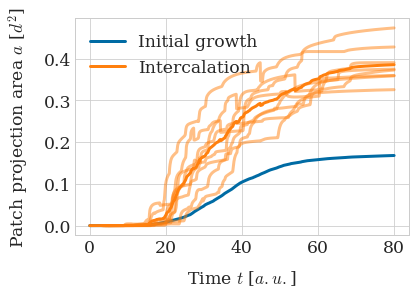

In [7]:
# Compare with column growth, psl =5
# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_comparison + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
#for seed in range(6):
for seed in range(8):
    print(seed)
    ppa = np.loadtxt(dir_comparison+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    #plt.plot(times_d, ppa, color=defcolors[5], alpha=0.5)
    ppa_av_d = ppa_av_d + ppa
ppa_av_d = ppa_av_d /8
plt.plot(times_d, ppa_av_d, color=defcolors[0], label='Initial growth')


# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_baseline + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
#for seed in range(6):
for seed in range(8):
    print(seed)
    ppa = np.loadtxt(dir_baseline+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    plt.plot(times_d, ppa, color=defcolors[1], alpha=0.5)
    ppa_av_d = np.nansum(np.vstack((ppa_av_d, ppa)), axis=0)
ppa_av_d = ppa_av_d /8
plt.plot(times_d, ppa_av_d, color=defcolors[1], label='Intercalation')

#plt.legend()
plt.xlabel('Time $t$ [$a.u.$]')
plt.ylabel('Patch projection area $a$ [$d^2$]')
plt.legend()

plt.savefig(path_to_plots+'intercalation_baseline.pdf', bbox_inches='tight', dpi=600)